# PAES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("AdmisionUes.csv")
data

,Unnamed: 0,admit,paes,nem,rank
0,1,0,328,6.4,2
1,2,1,636,6.5,2
2,3,1,986,6.8,4
3,4,1,599,6.0,1
4,5,0,441,5.7,1
...,...,...,...,...,...
1808,1809,1,986,6.3,3
1809,1810,0,429,5.6,4
1810,1811,1,642,6.8,3
1811,1812,0,392,5.6,1


<Axes: xlabel='paes', ylabel='Count'>

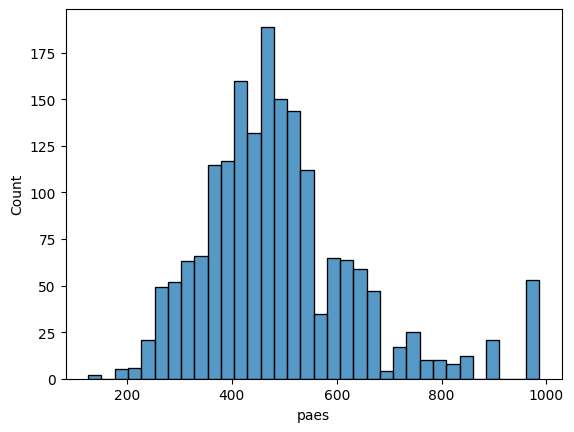

In [6]:
sns.histplot(data, x="paes")

<Axes: xlabel='paes', ylabel='Count'>

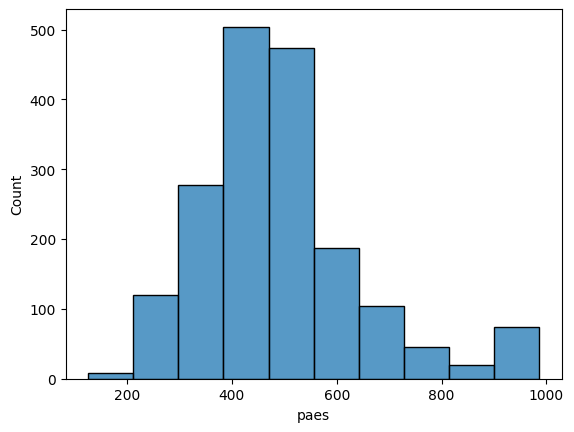

In [7]:
sns.histplot(data, x="paes", bins=10)

<Axes: ylabel='paes'>

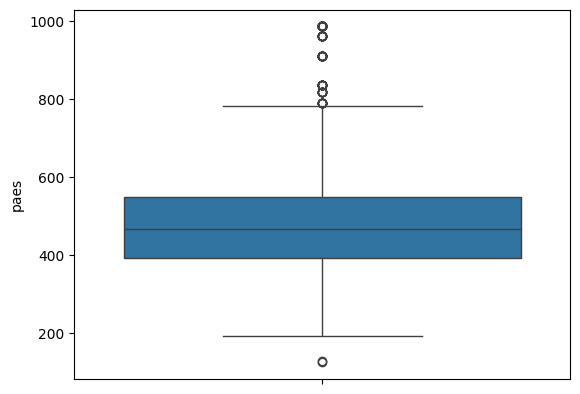

In [5]:
sns.boxplot(data, y="paes")

<Axes: xlabel='admit', ylabel='count'>

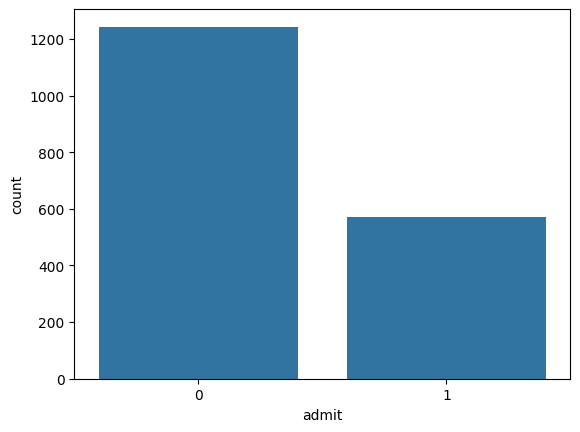

In [9]:
sns.countplot(data, x="admit")

<Axes: ylabel='nem'>

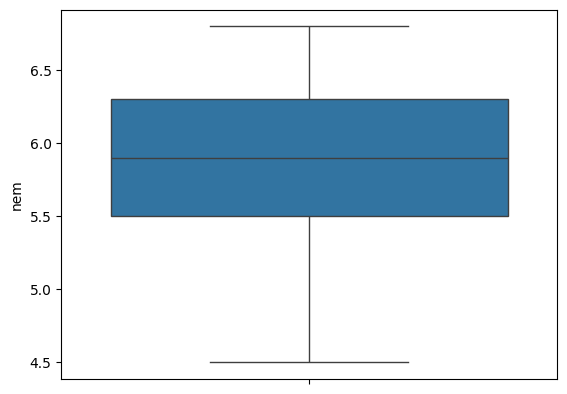

In [10]:
sns.boxplot(data, y="nem")

<Axes: xlabel='nem', ylabel='Count'>

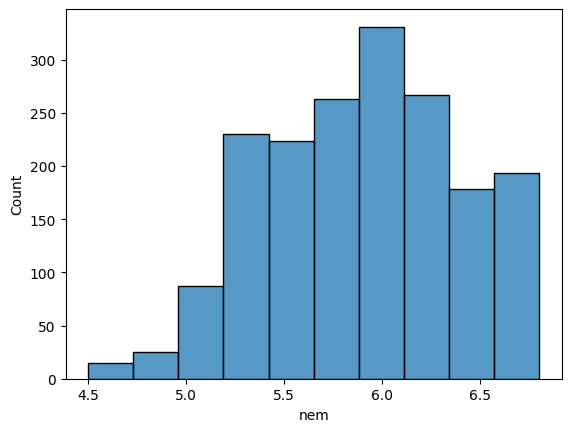

In [11]:
sns.histplot(data, x="nem", bins=10)

<Axes: ylabel='nem'>

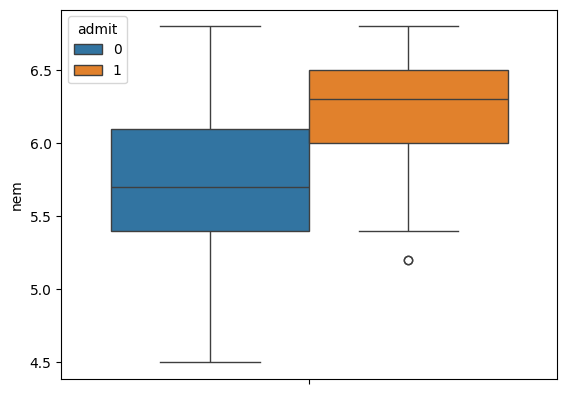

In [12]:
sns.boxplot(data, y="nem", hue="admit")

<Axes: ylabel='paes'>

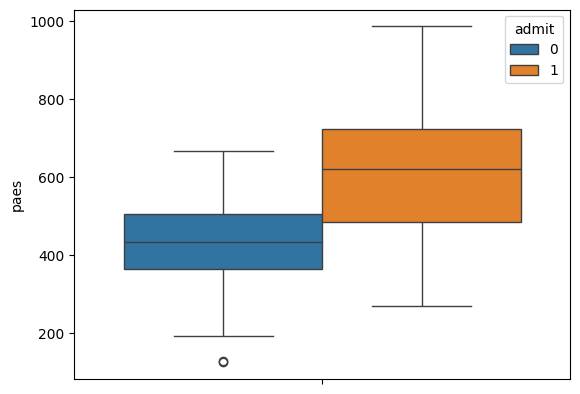

In [13]:
sns.boxplot(data, y="paes", hue="admit")

<Axes: xlabel='nem', ylabel='Count'>

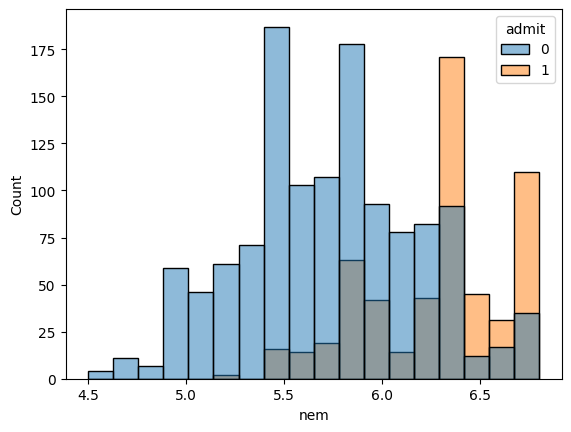

In [15]:
sns.histplot(data, x="nem", hue="admit")

<Axes: xlabel='paes', ylabel='Count'>

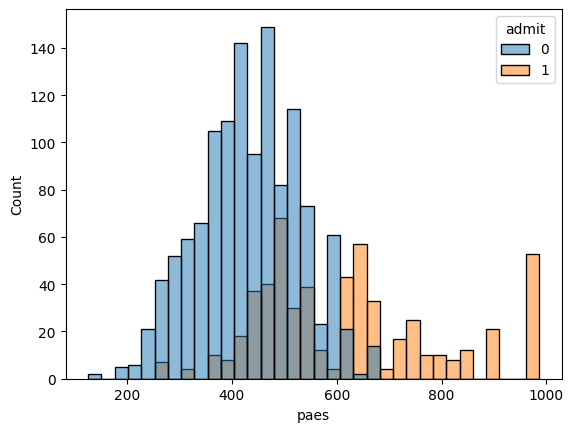

In [16]:
sns.histplot(data, x="paes", hue="admit")

# Model

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix)

from sklearn.model_selection import train_test_split

In [25]:
lr = LogisticRegression()
lr

LogisticRegression()

In [26]:
X = data[["nem", "paes"]]
y = data["admit"]
X.shape, y.shape

((1813, 2), (1813,))

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1359, 2), (454, 2), (1359,), (454,))

In [32]:
lr = LogisticRegression()
lr

LogisticRegression()

In [33]:
lr.fit(X_train, y_train)

LogisticRegression()

In [35]:
print("Accuracy", lr.score(X_train, y_train)) #Accuracy

Accuracy 0.8153053715967623


In [40]:
print("Accuracy", lr.score(X_test, y_test))

Accuracy 0.8193832599118943


El accuracy en train y test es similar, entonces es probable que tenga poco overfitting.

 # Metrics

In [48]:
y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)
y_prob = y_prob[:,1]

In [41]:
confusion_matrix(y_test, y_pred)

array([[297,  33],
       [ 49,  75]])

Tenemos datos desbalanceados, entonces la matriz de confusión no es muy útil

In [42]:
accuracy_score(y_test, y_pred)

0.8193832599118943

Lo mismo que con la matriz, ya que van de la mano

In [44]:
precision_score(y_test, y_pred)

0.6944444444444444

La precisión no es muy buena.

In [45]:
recall_score(y_test, y_pred)

0.6048387096774194

Solo pudimos predecir el 60% de los casos, tampoco es muy bueno.

In [46]:
f1_score(y_test, y_pred)

0.646551724137931

Tampoco es muy bueno.

In [51]:
roc_auc_score(y_test, y_prob)

np.float64(0.868939393939394)

Es mayor a 0.8, por lo tanto es un buen modelo.